# Data Retriving and Pre-processing

**Importing Libraries**


In [0]:
# ALL THE IMPORTS NECESSARY
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from geopy.distance import great_circle as vc
import math as Math

**Retriving Data**

In [0]:
data = pd.read_csv('/content/drive/My Drive/ML_2020/Project code/1920-2012-data.csv', index_col=None, names=['Year', 'Month', 'Day', 'Hour', 'HurricaneNum', 'Name', 'Lat', 'Long', 'WindSpeed', 'Pressure', 'NullCol'])

# Preview the first 5 rows of data
print(data.head())

#Averaging wind speed of particular hurricane name in particlar year
data['unique-key'] = data['Year'].map(str) + '-' + data['HurricaneNum'].map(str)
windSpeedAvg = data.groupby('unique-key', as_index=False)['WindSpeed'].mean()

windSpeedAvg['unique-key'] =  windSpeedAvg['unique-key'].str.split('-',n=1,expand=True)
print(windSpeedAvg[:12])

# Delete the columns of information that we are not using so far
data.drop(['Name','Month', 'Day', 'Hour', 'HurricaneNum', 'Lat', 'Long', 'Pressure' ,'NullCol','unique-key'], axis = 1, inplace = True)
data['Year']=windSpeedAvg['unique-key']
data['WindSpeed'] = windSpeedAvg['WindSpeed']
# Preview the first 5 rows of data after delete unnecessary columns
print(windSpeedAvg.shape)

data = data.dropna() 
data = data.reset_index(drop=True)
print(data.tail())
print(data.shape)

   Year  Month  Day  Hour  ...  Long WindSpeed Pressure  NullCol
0  2000      6    7    18  ... -93.0      25.0        0      NaN
1  2000      6    8     0  ... -92.8      25.0        0      NaN
2  2000      6    8     6  ... -93.1      25.0        0      NaN
3  2000      6    8    12  ... -93.5      25.0        0      NaN
4  2000      6   23     0  ... -19.8      25.0        0      NaN

[5 rows x 11 columns]
   unique-key  WindSpeed
0        1920  64.605263
1        1920  42.166667
2        1920  42.750000
3        1920  36.388889
4        1920  42.291667
5        1921  44.534884
6        1921  40.000000
7        1921  84.895833
8        1921  55.714286
9        1921  50.833333
10       1921  77.674419
11       1921  33.750000
(1225, 2)
      Year  WindSpeed
1220  2012  50.128205
1221  2012  33.333333
1222  2012  29.210526
1223  2012  58.461538
1224  2012  47.058824
(1225, 2)


**Pre-Processing Data**

In [0]:
list_of_wind_speed = data['WindSpeed'].to_list()

list_of_wind_speed = [i * 1.5 for i in list_of_wind_speed]  # unit of wind speed is knot 1knot = 1.5mph

#print("wind Speed : ",list_of_wind_speed[:5])
hurricane_type = []


## Categorized hurricane into 5 different types 
for i in list_of_wind_speed:
  if i>=74 and i<=95:
    hurricane_type.append(1)
  elif i>95 and i<=110:
    hurricane_type.append(2)
  elif i>110 and i<=129:
    hurricane_type.append(3)
  elif i>129 and i<=156:
    hurricane_type.append(4)
  elif i>156:
    hurricane_type.append(5)
  elif i<74:
    hurricane_type.append(0)
  else:
    hurricane_type.append(-1)

1225
hi 1225
1225


**Pre Processing Con.**

In [0]:
data['WindSpeed'] = list_of_wind_speed    # assign value of wind speed in mph unit
#Add new column in data frame
data['HurricaneType'] = hurricane_type

print("After adding new column :\n",data.head())
data = data[data['HurricaneType'] != 0]  # ignore all values which does not contain hurricane that is type 0
#print(data[data['HurricaneType'] == -1])
data = data.reset_index(drop=True)
print("After removing non hurricane entries :\n",data.head())
print("Shape of data : ",data.shape)


temp =data[data['Year'] == str(2000)]
print(len(temp))
print(temp[:5])
print("len of : ",len(temp[temp['HurricaneType'] ==1 ]))


print("Unique year : ",pd.unique(data['Year']))
print("Length of Unique year : ",len(pd.unique(data['Year'])))




After adding new column :
    Year  WindSpeed  HurricaneType
0  1920  96.907895              2
1  1920  63.250000              0
2  1920  64.125000              0
3  1920  54.583333              0
4  1920  63.437500              0
After removing non hurricane entries :
    Year   WindSpeed  HurricaneType
0  1920   96.907895              2
1  1921  127.343750              3
2  1921   83.571429              1
3  1921   76.250000              1
4  1921  116.511628              3
Shape of data :  (417, 3)
7
     Year   WindSpeed  HurricaneType
345  2000   80.689655              1
346  2000  111.923077              3
347  2000   75.267857              1
348  2000   88.181818              1
349  2000   84.204545              1
len of :  6
Unique year :  ['1920' '1921' '1922' '1923' '1924' '1925' '1926' '1927' '1928' '1929'
 '1930' '1931' '1932' '1933' '1934' '1935' '1936' '1937' '1938' '1939'
 '1940' '1941' '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949'
 '1950' '1951' '1952' '1953' 

**Pre Processing Con.**

In [0]:
hurricane_no =[]
unique_year = pd.unique(data['Year'])
for i in unique_year:
  for j in range(5):
    number = data[data['Year']==str(i)]
    hurricane_no.append([i,j+1,len(number[number['HurricaneType']==j+1])])
    

[['1920', 1, 0], ['1920', 2, 1], ['1920', 3, 0], ['1920', 4, 0], ['1920', 5, 0]]


**Store the data into csv**

In [0]:
df = pd.DataFrame(hurricane_no, columns = ['Year', 'HurricaneType','HurricaneFreq'])  
print(df)

df.to_csv(r'/content/drive/My Drive/ML_2020/Project code/final_data.csv')

     Year  HurricaneType  HurricaneFreq
0    1920              1              0
1    1920              2              1
2    1920              3              0
3    1920              4              0
4    1920              5              0
..    ...            ...            ...
455  2012              1              7
456  2012              2              0
457  2012              3              0
458  2012              4              0
459  2012              5              0

[460 rows x 3 columns]


# Model

In [0]:
# import required libraries
import pandas as pd
import numpy as np
import scipy.linalg
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv
from numpy.linalg import pinv
import math

In [0]:
# fetch data from file 

data = pd.read_csv('/content/drive/My Drive/Machine Learning/Hurricane_project/final_data.csv', usecols=['Year', 'HurricaneType','HurricaneFreq'])

# convert csv data into list for easy computation
list_year = data['Year'].to_list()
list_HurricaneType = data['HurricaneType'].to_list()
list_HurricaneFreq = data['HurricaneFreq'].to_list()

X= []
for i in range(0,len(list_year)):
    X.append([list_year[i],list_HurricaneType[i]])
print(X)
X = np.array(X)
Y = list_HurricaneFreq

# divide data in training and testing set (80-20)
size = int(len(X) * 0.8)
X_train = X[:size]
X_test = X[size:]

Y_train = Y[:size]
Y_test = Y[size:]

[[1920, 1], [1920, 2], [1920, 3], [1920, 4], [1920, 5], [1921, 1], [1921, 2], [1921, 3], [1921, 4], [1921, 5], [1922, 1], [1922, 2], [1922, 3], [1922, 4], [1922, 5], [1923, 1], [1923, 2], [1923, 3], [1923, 4], [1923, 5], [1924, 1], [1924, 2], [1924, 3], [1924, 4], [1924, 5], [1925, 1], [1925, 2], [1925, 3], [1925, 4], [1925, 5], [1926, 1], [1926, 2], [1926, 3], [1926, 4], [1926, 5], [1927, 1], [1927, 2], [1927, 3], [1927, 4], [1927, 5], [1928, 1], [1928, 2], [1928, 3], [1928, 4], [1928, 5], [1929, 1], [1929, 2], [1929, 3], [1929, 4], [1929, 5], [1930, 1], [1930, 2], [1930, 3], [1930, 4], [1930, 5], [1931, 1], [1931, 2], [1931, 3], [1931, 4], [1931, 5], [1932, 1], [1932, 2], [1932, 3], [1932, 4], [1932, 5], [1933, 1], [1933, 2], [1933, 3], [1933, 4], [1933, 5], [1934, 1], [1934, 2], [1934, 3], [1934, 4], [1934, 5], [1935, 1], [1935, 2], [1935, 3], [1935, 4], [1935, 5], [1936, 1], [1936, 2], [1936, 3], [1936, 4], [1936, 5], [1937, 1], [1937, 2], [1937, 3], [1937, 4], [1937, 5], [1938, 1]

In [0]:
# for building feature matrix of any polynomial degree
def multiplication(x1=0, x1_time=0, x2=0, x2_time=0):
    out_x1 = x1
    out_x2 = x2
    for i in range(x1_time-1):
        out_x1 = np.multiply(x1, out_x1)
        
    for j in range(x2_time-1):
        out_x2 = np.multiply(x2, out_x2)
        
    if x1_time==0:
        return out_x2
    elif x2_time==0:
        return out_x1
    else:
        return np.multiply(out_x1, out_x2)

In [0]:
## Create Phi polynomial matrix of any degree for 2 feature
def poly_features(X, K):
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1)) 
    X = np.array(X)
    x1 = X[:,0]
    x2 = X[:,1]
    N = X.shape[0]

    col = sum(range(K+2))

    #initialize Phi
    phi = np.ones((N, col))
    cnt=1

    for k in range(1, K+1):
        for i in range(k+1):
            phi[:, cnt] = multiplication(x1=x1, x1_time=k-i, x2=x2, x2_time=i) # for any degree polynomial
            cnt += 1
            
    return phi

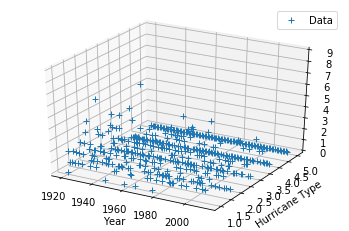

In [0]:
K = 5 # Define the degree of the polynomial we wish to fit
Phi = poly_features(X_train, K) # N x (K+1) feature matrix
theta_ml = nonlinear_features_maximum_likelihood(Phi, Y_train) # maximum likelihood estimator

# feature matrix for test inputs
Phi_test = poly_features(X_test, K)
y_pred = Phi_test @ theta_ml # predicted y-values
plt.figure()
ax = plt.axes(projection='3d')

# plot data for visulization
plt.plot(X[:,0], X[:,1], Y, '+')
plt.xlabel("Year")
plt.ylabel("Hurricane Type")
plt.legend(["Data"])

# RMSE

In [0]:
# Root Mean Square Error
def RMSE(y, ypred):
    diff_sqr = pow(y-ypred, 2)

    rmse = math.sqrt(1/len(y) * sum(diff_sqr)) ## sum of sqaue error between real and predict value
    return rmse

(0.805041791768958, 1.010232484224785)

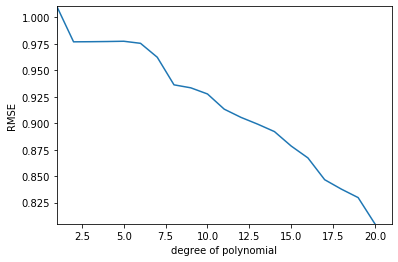

In [0]:
## training loss
K_max = 20  # max polynomial degree
rmse_train = np.zeros((K_max+1,))

for k in range(1, K_max+1):
    Phi = poly_features(X_train, k) # N x (K+1) feature matrix
    theta_ml = nonlinear_features_maximum_likelihood(Phi, Y_train) # maximum likelihood estimator

    y_pred = Phi @ theta_ml
    rmse_train[k] = RMSE(Y_train, y_pred) # RMSE for different degree polynomial
plt.figure()
plt.plot(rmse_train)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE");
plt.xlim(1, K_max+1)
plt.ylim(min(rmse_train[1:]), max(rmse_train))

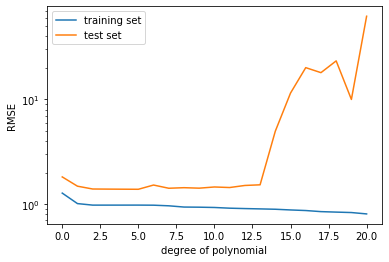

In [0]:
K_max = 20  # max polynomial degree
rmse_train = np.zeros((K_max+1,)) # initialize rmse for train and test data set
rmse_test = np.zeros((K_max+1,))
for k in range(K_max+1):
    
    # feature matrix
    Phi = poly_features(X_train, k) # N x (K+1) feature matrix
    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, Y_train) 
    # predict y-values of training set
    ypred_train = Phi @ theta_ml
    # RMSE on training set
    rmse_train[k] = RMSE(Y_train, ypred_train) 
    
    #--------------------------------------------------------------

    # feature matrix for test inputs
    Phi_test = poly_features(X_test, k) 
    # prediction (test set)
    ypred_test = Phi_test @ theta_ml 
    # RMSE on test set
    rmse_test[k] = RMSE(Y_test, ypred_test)
plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"])

# MLE

In [0]:
# theta_ml = (phi_T * phi)-1 phi_T*y

from numpy.linalg import pinv
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    kappa = 1e-08 # 'jitter' term; good for numerical stability
    
    D = Phi.shape[1]
    # maximum likelihood estimate
    X_transpose = Phi.T
    X_tran_X = np.matmul(X_transpose, Phi)
    
    X_tran_X_inv = pinv(X_tran_X)
    X_tran_X_inv_X_tran = np.matmul(X_tran_X_inv, X_transpose)
    theta_ml = np.matmul(X_tran_X_inv_X_tran, y)
    return theta_ml

# MAP

In [0]:
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    D = Phi.shape[1]
    # maximum likelihood estimate
    X_T = Phi.T
    X_T_X = np.matmul(X_T, Phi)

    # regularization element
    reg = (sigma**2 / alpha**2) * np.ones(X_T_X.shape)

    X_T_X_reg = X_T_X + reg
    
    X_T_X_reg_inv = pinv(X_T_X_reg)
    X_T_X_reg_inv_X_T = np.matmul(X_T_X_reg_inv, X_T)
    theta_map = np.matmul(X_T_X_reg_inv_X_T, y)
    return theta_map

In [0]:
sigma = 1.0 # noise standard deviation
alpha = 1.0 # standard deviation of the parameter prior

N=20

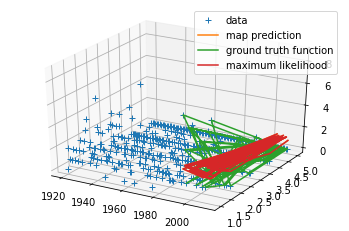

In [0]:
# get the MAP estimate
K = 8 # polynomial degree
# feature matrix
Phi = poly_features(X_train, K)
theta_map = map_estimate_poly(Phi, Y_train, sigma, alpha)
# maximum likelihood estimate
theta_ml = nonlinear_features_maximum_likelihood(Phi, Y_train)

Phi_test = poly_features(X_test, K)
y_pred_map = Phi_test @ theta_map
y_pred_mle = Phi_test @ theta_ml

plt.figure()
ax = plt.axes(projection='3d')
plt.plot(X[:,0],X[:,1], Y, '+')
plt.plot(X_test[:,0],X_test[:,1], y_pred_map)
plt.plot(X_test[:,0],X_test[:,1], Y_test)
plt.plot(X_test[:,0],X_test[:,1], y_pred_mle)
# plt.xlim(-5, 5)
# plt.ylim(-3.5, 1)
plt.legend(["data", "map prediction", "ground truth function", "maximum likelihood"])

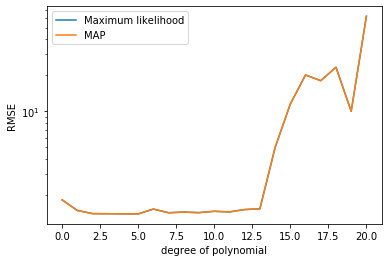

In [0]:
## EDIT THIS CELL

K_max = 20 # this is the maximum degree of polynomial we will consider
assert(K_max <= N) # this is the latest point when we'll run into numerical problems
rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))
for k in range(K_max+1):
    # rmse_mle[k] = -1 ## Compute the maximum likelihood estimator, compute the test-set 
    # feature matrix for test inputs
    Phi = poly_features(X_train, k) # N x (K+1) feature matrix
    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, Y_train)
    # prediction (test set)
    Phi_ml = poly_features(X_test, k)
    ypred_test_ml = Phi_ml @ theta_ml
    # RMSE on test set for MLE
    rmse_mle[k] = RMSE(Y_test, ypred_test_ml)

    #--------------------------------------------------------------------------------
    
    Phi = poly_features(X_train, k)
    theta_map = map_estimate_poly(Phi, Y_train, sigma, alpha)

    Phi_map = poly_features(X_test, k)
    ypred_test_map = Phi_map @ theta_map 
    # RMSE on test set for MAP
    rmse_map[k] = RMSE(Y_test, ypred_test_map) ## Compute the MAP estimator, compute the test-set predicitons, compute plt.figure()

plt.semilogy(rmse_mle) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_map) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])